# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
import json
btc_request_data = requests.get(btc_url)
btc_data = btc_request_data.json()

# Display the retrieved BTC data from the crypto API url
display(btc_data)
print()

# Display the current BTC price in CAD
btc_current_price_CAD = btc_data['data']['1']['quotes']['CAD']['price']
display(f"BTC current price: {btc_current_price_CAD:.2f} (CAD)")
print()

# Fetch current ETH price
eth_request_data = requests.get(eth_url)
eth_data = eth_request_data.json()

# Display the retrieved ETH data fromthe crypto API url
display(eth_data)
print()

# Display the current ETH price in CAD
eth_current_price_CAD = eth_data['data']['1027']['quotes']['CAD']['price']
display(f"ETH current price: {eth_current_price_CAD:.2f} (CAD)")

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19160512,
   'total_supply': 19160512,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 18948.21,
     'volume_24h': 21349708922,
     'market_cap': 362755796908,
     'percentage_change_1h': -0.139908625369856,
     'percentage_change_24h': -0.748036310027216,
     'percentage_change_7d': -5.8786019029684,
     'percent_change_1h': -0.139908625369856,
     'percent_change_24h': -0.748036310027216,
     'percent_change_7d': -5.8786019029684},
    'CAD': {'price': 25813.146483,
     'volume_24h': 29084708464.4406,
     'market_cap': 494182222127.768,
     'percent_change_1h': -0.139908625369856,
     'percent_change_24h': -0.748036310027216,
     'percent_change_7d': -5.8786019029684}},
   'last_updated': 1664138340}},
 'metadata': {'timestamp': 1664138340,
  'num_cryptocurrencies': 3116,
  'error': None}}

'BTC current price: 25813.15 (CAD)'

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120677983,
   'total_supply': 120677983,
   'max_supply': 120677983,
   'quotes': {'USD': {'price': 1296.73,
     'volume_24h': 10208090239,
     'market_cap': 156306309679,
     'percentage_change_1h': -0.317870534992968,
     'percentage_change_24h': -3.17293564481796,
     'percentage_change_7d': -11.8594931190305,
     'percent_change_1h': -0.317870534992968,
     'percent_change_24h': -3.17293564481796,
     'percent_change_7d': -11.8594931190305},
    'CAD': {'price': 1766.535279,
     'volume_24h': 13906481332.5897,
     'market_cap': 212936085675.702,
     'percent_change_1h': -0.317870534992968,
     'percent_change_24h': -3.17293564481796,
     'percent_change_7d': -11.8594931190305}},
   'last_updated': 1664138363}},
 'metadata': {'timestamp': 1664138363,
  'num_cryptocurrencies': 3116,
  'error': None}}

'ETH current price: 1766.54 (CAD)'

### Set BTC & ETH Values to Price Float Variables in $CAD

In [7]:
# Compute current value of my crypto
btc_current_price_CAD = (round(btc_current_price_CAD,2))
eth_current_price_CAD = (round(eth_current_price_CAD,2))

display(btc_current_price_CAD)
display(eth_current_price_CAD)

25492.99

1708.85

### Entire Cryptocurrency Wallet Value

In [8]:
# Calculate entire cryptocurrency wallet value
my_btc_value = my_btc * btc_current_price_CAD
display(f"{my_btc_value:.2f}")
my_eth_value = my_eth * eth_current_price_CAD
display(f"{my_eth_value:.2f}")

# Compute current value of my crpto
my_wallet_value_CAD = my_btc_value + my_eth_value
my_wallet_value_CAD = round(my_wallet_value_CAD,2)
my_wallet_value_CAD

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of the entire holdings is ${my_wallet_value_CAD:0.2f}")

'30975.78'

'9362.64'

The current value of your 1.2 BTC is $30975.78
The current value of your 5.3 ETH is $9362.64
The current value of the entire holdings is $40338.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
api_secret_key = os.getenv("ALPACA_SECRET_KEY")
display(api_key)

# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_secret_key,
    api_version="v2"
)

'PKDPJK26XZIR436ZUL8W'

In [13]:
# Format current date as ISO format
today = pd.Timestamp("2022-09-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio.head(5)

# Reorganize the DataFrame
# Separate ticker data

df_SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
df_AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([df_SPY, df_AGG], axis="columns", keys=["SPY", "AGG"])

# Preview DataFrame
df_portfolio.head(5)

SPY                                     \
                            open    high      low   close    volume   
timestamp                                                             
2022-09-20 04:00:00+00:00  385.1  386.12  381.195  384.09  76685764   

                                                    AGG                      \
                          trade_count        vwap  open  high    low  close   
timestamp                                                                     
2022-09-20 04:00:00+00:00      555454  384.152364  98.2  98.4  98.08  98.24   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2022-09-20 04:00:00+00:00  11210119       22324  98.237305

In [14]:
# Pick AGG and SPY close prices
spy_close_price = float(df_portfolio['SPY']['close'])
agg_close_price = float(df_portfolio['AGG']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.24
Current SPY closing price: $384.09


In [16]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19204.50
The current value of your 200 AGG shares is $19648.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_shares_value_CAD = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame(columns={'amount'}, index=['crypto', 'shares'])

df_savings['amount']=[my_wallet_value_CAD, my_shares_value_CAD]

# Display savings DataFrame
display(df_savings)

,amount
crypto,40338.41
shares,38852.50


array([<AxesSubplot:ylabel='amount'>], dtype=object)

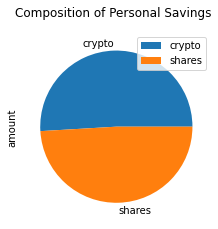

In [18]:
# Plot savings pie chart
df_savings.plot.pie(title='Composition of Personal Savings', subplots =True, figsize=[3.5,3.5])

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()
total_savings = round(float(total_savings),2)

# Calculate how many dollars the person is away from reaching their financial goal
savings_discrepancy = emergency_fund - total_savings

# Validate saving health
if (total_savings > emergency_fund): 
    print("Congratulations, you have enough total savings in your funds.")
if (total_savings == emergency_fund):
    print("Congratulations, you have reached your financial goal.")
if (total_savings < emergency_fund):
    print(f"You are ${savings_discrepancy} away from reaching your financial emergency funds goal.")

Congratulations, you have enough total savings in your funds.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-09-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-21', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1Day"
tickers = ["SPY", "AGG"]

# Reorganize the DataFrame
# Separate ticker data
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Concatenate the ticker DataFrames
df_SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
df_AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

df_portfolio = pd.concat([df_SPY, df_AGG], axis="columns", keys=["SPY", "AGG"])

# Display sample data
display(df_portfolio.head(3))
display(df_portfolio.tail(3))

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-09-21 04:00:00+00:00  249.87  249.9800  249.185  249.39  48211398   
2017-09-22 04:00:00+00:00  249.06  249.6300  249.020  249.44  51214032   
2017-09-25 04:00:00+00:00  249.16  249.5532  248.080  248.93  57064357   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-09-21 04:00:00+00:00      136973  249.610947  109.82  109.85  109.68   
2017-09-22 04:00:00+00:00      139814  249.361126  109.86  109.90  109.75   
2017-09-25 04:00:00+00:00      192970  248.875942  109.85  110.04  109.82   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-09-21 04:00:00+00:00  109.69  2210883        7113  109.756916  
2017-09-22 04:00:00+00:00  109.77  1461846        6970  109.810087  
2017-09-25 04:00:00+00:00  110.03  3937638       13206  109.962143

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2022-09-19 04:00:00+00:00  382.27  388.55  382.1784  388.55   72766494   
2022-09-20 04:00:00+00:00  385.10  386.12  381.1950  384.09   76685764   
2022-09-21 04:00:00+00:00  386.06  389.31  377.3800  377.45  104302139   

                                                     AGG                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2022-09-19 04:00:00+00:00      492471  386.239339  98.54  98.8400  98.48   
2022-09-20 04:00:00+00:00      555454  384.152364  98.20  98.4000  98.08   
2022-09-21 04:00:00+00:00      807310  383.197346  98.40  98.6001  97.86   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2022-09-19 04:00:00+00:00  98.68   5978949       18815  98.677767  
2022-09-20 04:00:00+00:00  98.24  11210119       22324  98.237305  
2022-09-21 04:00:00+00:00  98.55   6674502       32613  98.321112

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Configure and execute a Monte Carlo Simulation of 500 runs and 30 years for the 40/60 portfolio
MC_thirty_years = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [0.6,0.4],
    num_simulation=500,
    num_trading_days=252*30
)

In [26]:
# Printing the simulation input data
display(MC_thirty_years.portfolio_data.head(5))
display(MC_thirty_years.portfolio_data.tail(5))
# title= "500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-09-21 04:00:00+00:00  249.87  249.9800  249.185  249.39  48211398   
2017-09-22 04:00:00+00:00  249.06  249.6300  249.020  249.44  51214032   
2017-09-25 04:00:00+00:00  249.16  249.5532  248.080  248.93  57064357   
2017-09-26 04:00:00+00:00  249.45  249.7000  248.805  249.08  54081959   
2017-09-27 04:00:00+00:00  249.89  250.4900  248.870  250.05  79756426   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-21 04:00:00+00:00      136973  249.610947          NaN  109.82   
2017-09-22 04:00:00+00:00      139814  249.361126     0.000200  109.86   
2017-09-25 04:00:00+00:00      192970  248.875942    -0.002045  109.85   
2017-09-26 04:00:00+00:00      171834  249.209789     0.000603  109.95   
2017-09-27 04:00:00+00:00      215754  249.839037     0.003894  109.65   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2017-09-21 04:00:00+00:00  109.85  109.68  109.69  2210883        7113   
2017-09-22 04:00:00+00:00  109.90  109.75  109.77  1461846        6970   
2017-09-25 04:00:00+00:00  110.04  109.82  110.03  3937638       13206   
2017-09-26 04:00:00+00:00  110.02  109.88  109.99  2749892        9756   
2017-09-27 04:00:00+00:00  109.75  109.60  109.67  3042751        7265   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-21 04:00:00+00:00  109.756916          NaN  
2017-09-22 04:00:00+00:00  109.810087     0.000729  
2017-09-25 04:00:00+00:00  109.962143     0.002369  
2017-09-26 04:00:00+00:00  109.977579    -0.000364  
2017-09-27 04:00:00+00:00  109.673616    -0.002909

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2022-09-15 04:00:00+00:00  392.89  395.96  388.7800  390.12   87043825   
2022-09-16 04:00:00+00:00  384.18  386.25  382.1100  385.56  102473759   
2022-09-19 04:00:00+00:00  382.27  388.55  382.1784  388.55   72766494   
2022-09-20 04:00:00+00:00  385.10  386.12  381.1950  384.09   76685764   
2022-09-21 04:00:00+00:00  386.06  389.31  377.3800  377.45  104302139   

                                                                  AGG  \
                          trade_count        vwap daily_return   open   
timestamp                                                               
2022-09-15 04:00:00+00:00      604103  392.011342    -0.011353  99.04   
2022-09-16 04:00:00+00:00      669360  384.602012    -0.011689  98.66   
2022-09-19 04:00:00+00:00      492471  386.239339     0.007755  98.54   
2022-09-20 04:00:00+00:00      555454  384.152364    -0.011479  98.20   
2022-09-21 04:00:00+00:00      807310  383.197346    -0.017288  98.40   

                                                                          \
                              high      low  close    volume trade_count   
timestamp                                                                  
2022-09-15 04:00:00+00:00  99.1057  98.8436  98.90   5726225       15095   
2022-09-16 04:00:00+00:00  99.0100  98.6100  98.83   6960889       22173   
2022-09-19 04:00:00+00:00  98.8400  98.4800  98.68   5978949       18815   
2022-09-20 04:00:00+00:00  98.4000  98.0800  98.24  11210119       22324   
2022-09-21 04:00:00+00:00  98.6001  97.8600  98.55   6674502       32613   

                                                   
                                vwap daily_return  
timestamp                                          
2022-09-15 04:00:00+00:00  98.942986    -0.003024  
2022-09-16 04:00:00+00:00  98.802106    -0.000708  
2022-09-19 04:00:00+00:00  98.677767    -0.001518  
2022-09-20 04:00:00+00:00  98.237305    -0.004459  
2022-09-21 04:00:00+00:00  98.321112     0.003156

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/chris/Desktop/Git/Module-5-Challenge/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008197,1.003942,0.991773,0.984157,1.000714,1.008901,1.001776,0.992440,1.010049,1.003477,...,1.001819,0.997060,1.000628,1.002558,1.000918,0.999034,0.992611,1.022360,0.998373,1.003988
2,1.014933,1.000555,0.995039,0.976823,0.999765,1.000464,1.000184,0.993222,1.012308,1.008199,...,1.005650,1.001434,1.004628,0.995340,1.009145,1.007752,0.992378,1.017817,0.999915,1.006618
3,1.023812,0.991420,1.006215,0.964821,1.000845,1.001574,1.006356,0.987974,1.003225,1.017498,...,1.007441,1.001453,1.001390,1.002834,1.006928,1.014150,0.987543,1.004773,0.989809,0.990544
4,1.034776,0.992404,1.005940,0.962769,0.999485,1.008716,0.999244,0.970832,0.984498,1.010338,...,1.020985,0.998812,0.994815,0.999354,1.015500,1.016545,0.989227,1.004391,0.992248,0.975351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.190960,3.905793,2.411876,4.091432,1.499288,3.795928,5.321433,8.457473,6.076548,4.904585,...,7.603125,3.754306,8.008036,2.396412,1.451603,3.967398,3.180125,3.813941,5.175157,7.219523
7557,1.189526,3.915322,2.405917,4.099788,1.493603,3.761764,5.384620,8.496597,6.092173,4.971735,...,7.566430,3.760698,8.020086,2.430032,1.436934,3.982166,3.186981,3.828205,5.203605,7.179537
7558,1.180944,3.953295,2.386768,4.121951,1.484705,3.796769,5.456754,8.552600,6.028575,4.958648,...,7.636034,3.765436,8.059714,2.440427,1.453023,3.991806,3.253216,3.844056,5.164449,7.155574
7559,1.169096,3.963872,2.362411,4.115546,1.474949,3.755545,5.433262,8.487570,6.075881,4.944533,...,7.622208,3.809110,8.153882,2.387888,1.466672,3.996778,3.224116,3.923995,5.170188,7.114761


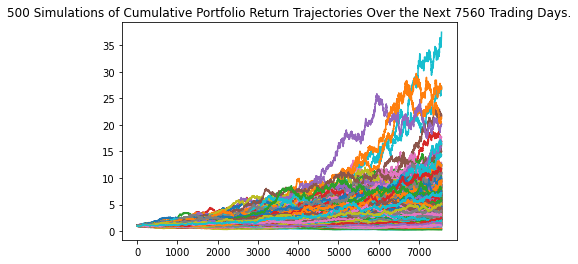

In [28]:
# Plot simulation outcomes
line_plot_thirty_6040 = MC_thirty_years.plot_simulation()

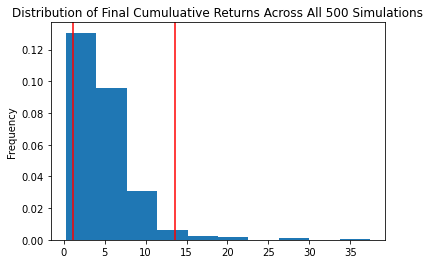

In [29]:
# Plot probability distribution and confidence intervals
dist_plot_thirty_6040 = MC_thirty_years.plot_distribution()

In [30]:
# Save both graphical figures created above as .png for display later
# i.) Line Plot Simulation 
line_plot_thirty_6040.get_figure().savefig("500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days", bbox_inches="tight")

# ii.) Distribution Plot Simulation
dist_plot_thirty_6040.get_figure().savefig("Distribution of Final Cumulative Returns Across All 500 Simulations", bbox_inches="tight")

### Retirement Analysis

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_thirty_6040 = MC_thirty_years.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_thirty_6040)

count           500.000000
mean              4.967865
std               3.750712
min               0.249007
25%               2.632116
50%               4.018405
75%               6.315104
max              37.439545
95% CI Lower      1.164192
95% CI Upper     13.581325
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = (round(summary_stats_thirty_6040[8],3) * initial_investment)
ci_upper = (round(summary_stats_thirty_6040[9],5) * initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $23280.0 and $271626.6


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [56]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = (round(summary_stats_thirty_6040[8],4) * initial_investment)
ci_upper = (round(summary_stats_thirty_6040[9],6) * initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $34926.0 and $407439.75


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [59]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data= df_portfolio,
    weights=[0.6,0.4],
    num_simulation=500,
    num_trading_days=252*5
)

In [60]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/chris/Desktop/Git/Module-5-Challenge/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012975,0.982302,1.004930,1.007007,1.004508,1.007123,1.002181,0.999365,0.991013,1.005214,...,0.999683,1.005940,1.000589,1.000642,1.003349,1.006638,1.003424,0.996308,1.003998,0.996592
2,1.024399,0.985103,1.014359,0.997269,1.008989,1.008888,0.993223,1.006055,0.978852,1.003169,...,1.009267,1.014337,0.989673,1.005001,1.004718,1.005459,1.001310,1.001218,1.000872,1.000980
3,1.013370,0.973150,1.014763,0.988863,1.004487,1.007365,0.995410,1.010214,0.969999,1.001932,...,1.012648,1.016533,0.993389,1.000360,0.992871,1.012240,1.009084,1.005292,1.015609,0.998090
4,1.021460,0.978476,0.996481,0.976135,1.004185,1.014975,1.000980,1.023591,0.972952,1.007713,...,0.999156,1.015487,0.987117,1.004668,1.009604,1.014511,1.000204,1.008497,1.007212,1.007541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.584441,1.197800,1.269913,0.914141,1.086251,1.112283,1.221432,1.679560,0.763460,1.615070,...,1.508263,2.346471,1.414407,0.920231,2.011615,1.248521,0.936080,1.166240,1.042608,1.340440
1257,1.585344,1.187140,1.265088,0.905225,1.089684,1.118071,1.220079,1.664894,0.773518,1.617653,...,1.512764,2.329931,1.444171,0.919660,2.028334,1.242914,0.935632,1.172363,1.047648,1.355674
1258,1.586427,1.193639,1.265897,0.907322,1.076622,1.126255,1.243874,1.673712,0.775932,1.634506,...,1.515570,2.296147,1.445725,0.922156,2.037977,1.245765,0.942656,1.171112,1.046358,1.357261
1259,1.586822,1.193692,1.269986,0.903085,1.075657,1.129181,1.233908,1.675383,0.768930,1.646671,...,1.514210,2.314477,1.466461,0.935573,2.047508,1.251407,0.951731,1.164582,1.032937,1.363551


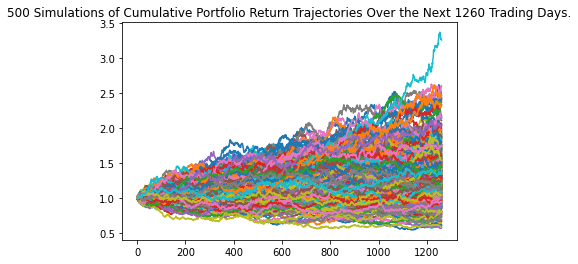

In [61]:
# Plot simulation outcomes
line_plot_five_6040 = MC_five_years.plot_simulation()

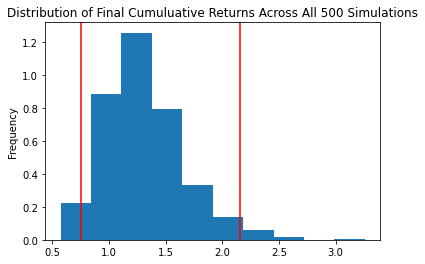

In [62]:
# Plot probability distribution and confidence intervals
dist_plot_five_6040 = MC_five_years.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_five_6040 = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_five_6040)

count           500.000000
mean              1.306412
std               0.364345
min               0.571965
25%               1.058212
50%               1.261806
75%               1.501278
max               3.257476
95% CI Lower      0.749812
95% CI Upper      2.155035
Name: 1260, dtype: float64


In [64]:
# Set initial investment
initial_investment = 20000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = (round(summary_stats_five_6040[8],6) * initial_investment)
ci_upper_five = (round(summary_stats_five_6040[9],6) * initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $14996.24 and $43100.7


### Ten Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data=df_portfolio,
    weights=[0.8,0.2],
    num_simulation=500,
    num_trading_days=252*10
)

In [66]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/chris/Desktop/Git/Module-5-Challenge/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985893,0.976996,0.999982,0.995716,1.011088,0.999715,1.003732,0.990717,0.981338,0.988865,...,0.997384,1.003418,1.008496,0.995095,0.990341,1.018985,0.992556,0.993089,1.003474,1.021385
2,0.995040,0.978428,0.990769,1.001103,0.992572,0.997564,0.990305,0.989107,0.970174,0.989056,...,1.001238,1.000474,1.010298,1.005911,0.991043,1.017009,0.997519,0.988224,0.996343,1.026327
3,0.988260,0.980252,0.998700,0.996831,0.996653,1.009972,0.987794,0.988697,0.968481,0.999763,...,0.991070,0.992757,1.022094,1.003484,0.993735,1.014670,0.989274,0.991302,0.988788,1.020843
4,0.991055,0.975288,0.990611,0.997997,1.002356,1.002975,0.991383,0.969911,0.960935,0.996979,...,1.010471,0.975648,1.032530,0.990346,0.989102,1.009123,0.983942,1.006110,0.986530,1.006496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.202299,2.432211,1.257742,2.664441,0.895217,2.121704,1.670756,0.561011,1.174971,2.200484,...,1.236452,2.061256,2.205419,1.062426,4.146707,0.823408,0.840748,1.766933,1.475539,0.603955
2517,2.187799,2.468024,1.260688,2.720216,0.898909,2.096587,1.675475,0.558816,1.182123,2.216926,...,1.241381,2.066970,2.223433,1.054336,4.163436,0.812013,0.844282,1.742637,1.459439,0.595553
2518,2.166131,2.446847,1.275605,2.673851,0.893623,2.064041,1.664319,0.566405,1.185259,2.171263,...,1.253468,2.046401,2.189157,1.038594,4.139492,0.806405,0.832940,1.746773,1.434931,0.598911
2519,2.134450,2.480260,1.290537,2.632541,0.875639,2.038525,1.673317,0.549867,1.162027,2.147045,...,1.246898,2.038979,2.195779,1.040006,4.094611,0.808278,0.837881,1.738720,1.420948,0.603429


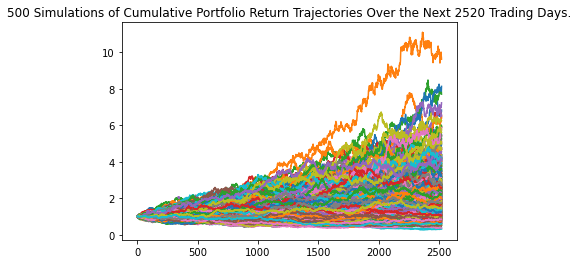

In [67]:
# Plot simulation outcomes
line_plot_ten_8020 = MC_ten_years.plot_simulation()

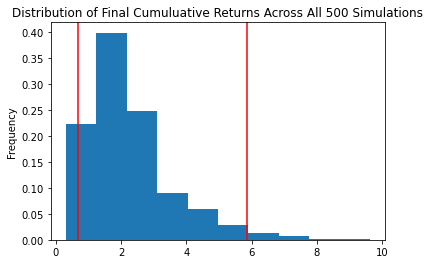

In [68]:
# Plot probability distribution and confidence intervals
dist_plot_ten_8020 = MC_ten_years.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_ten_8020 = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_ten_8020)

count           500.000000
mean              2.252156
std               1.315186
min               0.308086
25%               1.344009
50%               1.969136
75%               2.682684
max               9.629607
95% CI Lower      0.689259
95% CI Upper      5.863103
Name: 2520, dtype: float64


In [71]:
# Set initial investment
initial_investment = 20000

ci_lower_value = summary_stats_ten_8020[6]
ci_upper_value = summary_stats_ten_8020[9]

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = (round(ci_lower_value,6)) * initial_investment
ci_upper_ten = (round(ci_upper_value,6)) * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $53653.68 and $117262.06


In [74]:
# Determine if there is enough savings after 10 years with an 80/20 [SPY/AGG] portfolio weighting to retire after 
# running the above MCSimulation & analyzing the summary stats.

print(f"Therefore, although much more criteria & specific retirement aims are required for each member, based on a 10 year 80/20 "
      f"portfolio alone, I would not feel confident to say any member would be able to retire after 10 years." 
      f"a return of {ci_lower_ten} & {ci_upper_ten} is not enough to sustain any reasonable retirement budget. However," 
      f"depending upon a combined portfolio with 1.2 BTC & 5.3 ETH (although MCSimulations for BTC/ETH were not performed), due" 
      f"the traditionally high Sharpe's ratio and logarithmic return nature of crypto, it is possible to aim for semi-retirement,"
      f"or possible retirement with a combined crypto & SPY/AGG retirement portfolio after 10 years. Again, more data would be"
      f"needed, and it's not probable, but perhaps possible to achieve retirement in this scenario.")

Therefore, although much more criteria & specific retirement aims are required for each member, based on a 10 year 80/20 portfolio alone, I would not feel confident to say any member would be able to retire after 10 years.a return of 53653.68 & 117262.06 is not enough to sustain any reasonable retirement budget. However,depending upon a combined portfolio with 1.2 BTC & 5.3 ETH (although MCSimulations for BTC/ETH were not performed), duethe traditionally high Sharpe's ratio and logarithmic return nature of crypto, it is possible to aim for semi-retirement,or possible retirement with a combined crypto & SPY/AGG retirement portfolio after 10 years. Again, more data would beneeded, and it's not probable, but perhaps possible to achieve retirement in this scenario.
